# GMM for anomaly detection

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline



from sklearn.model_selection import train_test_split
from sklearn import mixture
from sklearn.mixture import GaussianMixture as GMM
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics

#  Get DK data

In [5]:
import zipfile
with zipfile.ZipFile('hackathon_kpis_anonymised.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# Gaussian Mixture Models EM

In [6]:
df = pd.read_csv('hackathon_kpis_anonymised.csv')

In [7]:
df

,cell_name,timestamp,ho_failure_rate,num_voice_attempts,voice_drop_rate,num_data_attempts,voice_setup_failure_rate,voice_tot_failure_rate,avail_period_duration,bandwidth,throughput_rate,data_setup_failure_rate,data_drop_rate,data_tot_failure_rate,unavail_total_rate,unavail_unplan_rate
0,00_11Z,2020-04-09 15:00:00+00:00,0.333333,0.000927,0.0,0.004527,0.0,0.0,1.0,0.49975,0.000195,0.000000,0.000731,0.000731,0.333364,0.0
1,00_11Z,2020-04-22 14:00:00+00:00,0.360000,0.017609,0.0,0.012312,0.0,0.0,1.0,0.49975,0.000197,0.001075,0.000269,0.000403,0.333364,0.0
2,00_11Z,2020-05-08 21:00:00+00:00,0.333333,0.002780,0.0,0.008115,0.0,0.0,1.0,0.49975,0.000196,0.000000,0.000000,0.000000,0.333364,0.0
3,00_11Z,2020-05-10 13:00:00+00:00,0.380952,0.012048,0.0,0.004898,0.0,0.0,1.0,0.49975,0.000116,0.000000,0.002027,0.002027,0.333364,0.0
4,00_11Z,2020-05-12 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.49975,NaN,NaN,NaN,NaN,0.666728,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042683,23_31W,2020-06-30 23:00:00+00:00,0.333333,0.000000,NaN,0.004197,NaN,NaN,1.0,1.00000,0.000293,0.000000,0.000000,0.000000,0.333364,0.0
1042684,23_31W,2020-07-05 15:00:00+00:00,0.336824,0.004634,0.0,0.011107,0.0,0.0,1.0,1.00000,0.000443,0.000000,0.001639,0.001639,0.333364,0.0
1042685,23_31W,2020-08-12 17:00:00+00:00,0.336585,0.014829,0.0,0.011742,0.0,0.0,1.0,1.00000,0.000352,0.000000,0.000986,0.000986,0.333364,0.0
1042686,23_31W,2020-08-28 14:00:00+00:00,0.333333,0.021316,0.0,0.020003,0.0,0.0,1.0,1.00000,0.000188,0.000662,0.000000,0.000083,0.333364,0.0


In [8]:
df = df.sort_values(by = 'timestamp')

In [9]:
df.head()

,cell_name,timestamp,ho_failure_rate,num_voice_attempts,voice_drop_rate,num_data_attempts,voice_setup_failure_rate,voice_tot_failure_rate,avail_period_duration,bandwidth,throughput_rate,data_setup_failure_rate,data_drop_rate,data_tot_failure_rate,unavail_total_rate,unavail_unplan_rate
519830,22_21Q,2019-11-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.09955,NaN,NaN,NaN,NaN,0.333364,0.0
486561,02_31Q,2019-11-04 00:00:00+00:00,NaN,0.000000,NaN,0.000781,NaN,NaN,1.0,0.09955,2.322707e-08,0.0,0.002119,0.002119,0.333364,0.0
850004,25_11W,2019-11-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.00000,NaN,NaN,NaN,NaN,0.666728,0.0
116626,28_11Y,2019-11-04 00:00:00+00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,1.0,0.00000,NaN,NaN,NaN,NaN,0.666728,NaN
144594,12_21W,2019-11-04 00:00:00+00:00,NaN,0.013902,0.0,0.091727,0.0,0.0,1.0,1.00000,5.298183e-04,0.0,0.000090,0.000090,0.333364,0.0


In [10]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['ho_failure_rate', 'num_voice_attempts', 'voice_drop_rate', 'num_data_attempts', 'voice_setup_failure_rate', 'voice_tot_failure_rate', 'throughput_rate', 'data_setup_failure_rate', 'data_drop_rate', 'data_tot_failure_rate', 'unavail_unplan_rate']


In [11]:
df = df.fillna(0.)

In [12]:
df.describe()

,ho_failure_rate,num_voice_attempts,voice_drop_rate,num_data_attempts,voice_setup_failure_rate,voice_tot_failure_rate,avail_period_duration,bandwidth,throughput_rate,data_setup_failure_rate,data_drop_rate,data_tot_failure_rate,unavail_total_rate,unavail_unplan_rate
count,1.042688e+06,1.042688e+06,1.042688e+06,1.042688e+06,1.042688e+06,1.042688e+06,1.042688e+06,1.042688e+06,1.042688e+06,1.042688e+06,1.042688e+06,1.042688e+06,1.042688e+06,1.042688e+06
mean,1.530384e-01,1.077434e-02,4.347789e-04,1.813760e-02,5.922960e-04,6.322109e-04,9.990099e-01,3.435080e-01,1.403366e-04,2.271757e-03,2.859883e-04,5.699579e-04,3.579869e-01,1.420338e-05
std,1.715615e-01,2.644856e-02,8.007350e-03,3.619180e-02,1.471574e-02,9.421506e-03,2.345380e-02,3.452026e-01,1.760260e-03,1.842391e-02,2.125696e-03,3.300036e-03,8.600321e-02,1.051329e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.131866e-03,0.000000e+00,0.000000e+00,1.000000e+00,9.954977e-02,3.273213e-08,0.000000e+00,0.000000e+00,0.000000e+00,3.333642e-01,0.000000e+00
50%,0.000000e+00,1.853568e-03,0.000000e+00,5.732138e-03,0.000000e+00,0.000000e+00,1.000000e+00,9.954977e-02,4.183099e-05,0.000000e+00,0.000000e+00,0.000000e+00,3.333642e-01,0.000000e+00
75%,3.333333e-01,9.267841e-03,0.000000e+00,1.891738e-02,0.000000e+00,0.000000e+00,1.000000e+00,4.997499e-01,1.996368e-04,7.238509e-04,1.578283e-04,4.441519e-04,3.333642e-01,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [13]:
df.columns

Index(['cell_name', 'timestamp', 'ho_failure_rate', 'num_voice_attempts',
       'voice_drop_rate', 'num_data_attempts', 'voice_setup_failure_rate',
       'voice_tot_failure_rate', 'avail_period_duration', 'bandwidth',
       'throughput_rate', 'data_setup_failure_rate', 'data_drop_rate',
       'data_tot_failure_rate', 'unavail_total_rate', 'unavail_unplan_rate'],
      dtype='object')

In [14]:
cell_occurrences = pd.DataFrame(df.cell_name.value_counts())
cell_occurrences.columns = ['count']

In [15]:
cell_occurrences

,count
18_12Q,2780
21_11V,2780
22_31Q,2776
09_31R,2773
18_22Q,2769
...,...
13_31R,533
13_11R,507
31_11W,116
30_11R,81


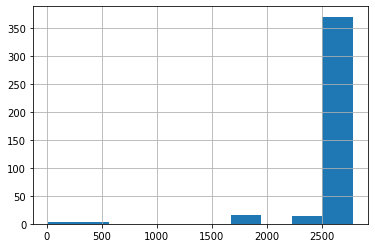

In [16]:
cell_occurrences['count'].hist()

### Optimal clusters

In [17]:
# full dataset

XX = np.array(df[['avail_period_duration', 'bandwidth',
       'num_voice_attempts', 'num_data_attempts', 'voice_tot_failure_rate',
       'data_tot_failure_rate', 'unavail_unplan_rate', 'unavail_total_rate',
       'voice_setup_failure_rate', 'voice_drop_rate',
       'data_setup_failure_rate', 'data_drop_rate', 'throughput_rate',
       'ho_failure_rate']].values)

In [18]:
XX.shape

(1042688, 14)

In [19]:
# selecting n columns of the dataset

n = 14
X = XX[:,:n]

In [20]:
# splitting the dataset into train-test by using dates

nobs = df[df['timestamp']>='2020-11'].shape[0]

X_train  = X[:-nobs,:]
X_test = X[-nobs:,:]

# getting the train-test percentage

print('The total dataset consists of',X.shape[0],'rows')
print('The training dataset consists of',X_train.shape[0],'rows')
print('The test dataset consists of',X_test.shape[0],'rows')
print(np.round(X_train.shape[0]/X.shape[0]*100), '-',np.round(X_test.shape[0]/X.shape[0]*100),'percent split')

The total dataset consists of 1042688 rows
The training dataset consists of 916288 rows
The test dataset consists of 126400 rows
88.0 - 12.0 percent split


###  Setting parameter on split

- If you want to train on the whole dataset set **train_test = False**
- If you want to plit the dataset in training and testing set **train_test = True**
<br>


In [21]:
#Parameter  to set
train_test = False

In [22]:
# random sample for finding best cluster number


if  train_test == True:
    size_sample = 10000
    randomly_sampled = np.random.choice(X_train.shape[0], size=size_sample, replace=False)

    X_sample = X[randomly_sampled,:]
else:
    size_sample = 10000
    randomly_sampled = np.random.choice(X.shape[0], size=size_sample, replace=False)

    X_sample = X[randomly_sampled,:]

    

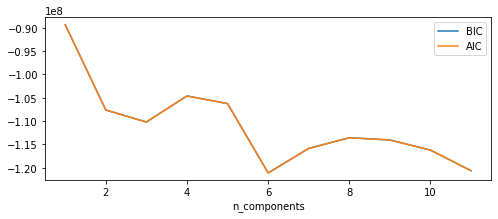

In [23]:
rcParams['figure.figsize'] = 8,3

if train_test  ==  True:
    n_components = np.arange(1, 12)
    models = [GMM(n, covariance_type='full', random_state=0).fit(X_sample)
              for n in n_components]

    plt.plot(n_components, [m.bic(X_train) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(X_train) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components');
else:
    n_components = np.arange(1, 12)
    models = [GMM(n, covariance_type='full', random_state=0).fit(X_sample)
              for n in n_components]

    plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components');
    

In [24]:
n_components = 2

In [25]:
if train_test  ==  True:
    gmm=GMM(n_components, n_init=1).fit(X_train) 
    labels=gmm.predict(X_test)
    scores = gmm.predict_proba(X_test)
else:
    gmm=GMM(n_components, n_init=1).fit(X) 
    labels=gmm.predict(X)
    scores = gmm.predict_proba(X)

In [26]:
#eps = 1/n_components +0.1/n_components
eps=0.55

In [27]:
if train_test:
    indices_test = [i for i, x in enumerate(scores.max(axis=1)<eps) if x == True]
    df_test = df[df['timestamp']>='2020-11'].reset_index().drop('index',1)
    df_test['anomaly'] = np.where(df_test.index.isin(indices_test), 1, 0)
    df_test =  df_test.set_index('timestamp')
    anomaly_dataset = df_test[df_test['anomaly']==1]
    print('The model has found',df_test[df_test['anomaly']==1].shape[0],'anomalies')
    print('associated to the following cells:')
    print(df_test[df_test['anomaly']==1]['cell_name'].value_counts())

else:
    indices = [i for i, x in enumerate(scores.max(axis=1)<eps) if x == True]
    df_tot = df.reset_index().drop('index',1)
    df_tot['anomaly'] = np.where(df.index.isin(indices), 1, 0)
    df_tot =  df_tot.set_index('timestamp') 
    anomaly_dataset = df_tot[df_tot['anomaly']==1]
    print('The model has found',df_tot[df_tot['anomaly']==1].shape[0],'anomalies')
    print('associated to the following cells:')
    print(df_tot[df_tot['anomaly']==1]['cell_name'].value_counts())

The model has found 715 anomalies
associated to the following cells:
12_31R    6
05_31R    6
08_11X    5
12_32W    5
01_21X    5
         ..
14_31V    1
23_21Q    1
23_32W    1
06_32Q    1
24_32Q    1
Name: cell_name, Length: 331, dtype: int64


## List of all anomalies identified with GMM using 2 components and eps for thresholding probabilities

In [28]:
anomaly_dataset

,cell_name,ho_failure_rate,num_voice_attempts,voice_drop_rate,num_data_attempts,voice_setup_failure_rate,voice_tot_failure_rate,avail_period_duration,bandwidth,throughput_rate,data_setup_failure_rate,data_drop_rate,data_tot_failure_rate,unavail_total_rate,unavail_unplan_rate,anomaly
timestamp,,,,,,,,,,,,,,,,
2019-11-04 18:00:00+00:00,08_21Q,0.000000,0.000000,0.0,0.002502,0.0,0.0,1.0,0.099550,6.708195e-06,0.000000,0.000000,0.000000,0.333364,0.0,1
2019-11-05 19:00:00+00:00,14_31R,0.000000,0.003707,0.0,0.004117,0.0,0.0,1.0,0.499750,1.146684e-04,0.000000,0.000000,0.000000,0.333364,0.0,1
2019-11-05 23:00:00+00:00,14_22W,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.666728,0.0,1
2019-11-06 17:00:00+00:00,08_21R,0.333333,0.109361,0.0,0.104661,0.0,0.0,1.0,0.499750,1.077087e-04,0.000253,0.000016,0.000047,0.333364,0.0,1
2019-11-06 22:00:00+00:00,09_11W,0.333333,0.000927,0.0,0.001549,0.0,0.0,1.0,1.000000,1.923651e-04,0.000000,0.000000,0.000000,0.333364,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16 08:00:00+00:00,19_31V,0.000000,0.009268,0.0,0.005904,0.0,0.0,1.0,0.049525,9.524271e-08,0.006726,0.000000,0.000841,0.333364,0.0,1
2020-12-17 21:00:00+00:00,14_11Q,0.000000,0.000927,0.0,0.009975,0.0,0.0,1.0,0.099550,3.358931e-05,0.010617,0.000166,0.001493,0.333364,0.0,1
2020-12-18 03:00:00+00:00,01_31X,0.333333,0.000000,0.0,0.001972,0.0,0.0,1.0,0.249625,3.180749e-04,0.000000,0.000000,0.000000,0.333364,0.0,1


In [29]:
anomaly_df = pd.DataFrame(anomaly_dataset['cell_name'].value_counts())
anomaly_df = anomaly_df.reset_index()
anomaly_df.columns = ['cell_name','count']
anomaly_df['site'] = anomaly_df['cell_name'].apply(lambda x: x[:2])

In [30]:
site_cnt = anomaly_df['site'].value_counts().to_dict()

In [31]:
anomaly_df['site_cnt'] = anomaly_df['site'].apply(lambda x: int(site_cnt[x]))

In [32]:
anomaly_df = anomaly_df.sort_values('cell_name')

In [33]:
anomaly_df

,cell_name,count,site,site_cnt
257,00_11R,1,00,26
199,00_11V,2,00,26
155,00_11W,2,00,26
135,00_11X,2,00,26
82,00_11Y,3,00,26
...,...,...,...,...
216,26_32Q,2,26,4
21,27_11Q,4,27,2
185,27_12Q,2,27,2
165,28_11Y,2,28,2


In [34]:
anomaly_df[anomaly_df['site'] =='00']['cell_name'].unique()

array(['00_11R', '00_11V', '00_11W', '00_11X', '00_11Y', '00_11Z',
       '00_12Q', '00_12W', '00_21Q', '00_21R', '00_21V', '00_21W',
       '00_21X', '00_21Y', '00_21Z', '00_22Q', '00_22W', '00_31Q',
       '00_31R', '00_31V', '00_31W', '00_31X', '00_31Y', '00_31Z',
       '00_32Q', '00_32W'], dtype=object)

## Example of anomalous behaviour in a cell

In [35]:
df_plot = {}

if train_test:
    for i in  anomaly_dataset['cell_name'].value_counts().index:
        df_plot[i] = df_test[df_test['cell_name']== i]
else:
    for i in  anomaly_dataset['cell_name'].value_counts().index:
        df_plot[i] = df_tot[df_tot['cell_name']== i]
    

In [36]:
if train_test:
    cell_most_anomalous_events  = anomaly_dataset['cell_name'].value_counts().index[0]
else:
    cell_most_anomalous_events = anomaly_dataset['cell_name'].value_counts().index[0]

In [37]:
#checking how many timestamps we have for the cell with most number of anomlies:
print('The cell with most anomalous events has\n\n',cell_occurrences.loc[cell_most_anomalous_events], '\n\ntimestamps')


The cell with most anomalous events has

 count    2525
Name: 12_31R, dtype: int64 

timestamps


In [38]:
anomaly_dataset[anomaly_dataset['cell_name'] == cell_most_anomalous_events]

,cell_name,ho_failure_rate,num_voice_attempts,voice_drop_rate,num_data_attempts,voice_setup_failure_rate,voice_tot_failure_rate,avail_period_duration,bandwidth,throughput_rate,data_setup_failure_rate,data_drop_rate,data_tot_failure_rate,unavail_total_rate,unavail_unplan_rate,anomaly
timestamp,,,,,,,,,,,,,,,,
2020-01-21 12:00:00+00:00,12_31R,0.333333,0.019462,0.0,0.017527,0.0,0.0,1.0,0.49975,0.000132,0.000755,0.000000,0.000094,0.333364,0.0,1
2020-03-07 11:00:00+00:00,12_31R,0.346283,0.026877,0.0,0.076120,0.0,0.0,1.0,0.49975,0.000224,0.000348,0.000109,0.000152,0.333364,0.0,1
2020-04-27 00:00:00+00:00,12_31R,0.333333,0.000000,0.0,0.012431,0.0,0.0,1.0,0.49975,0.000295,0.000000,0.000266,0.000266,0.333364,0.0,1
2020-09-01 20:00:00+00:00,12_31R,0.339806,0.010195,0.0,0.013940,0.0,0.0,1.0,0.49975,0.000261,0.000000,0.000475,0.000475,0.333364,0.0,1
2020-09-28 02:00:00+00:00,12_31R,0.333333,0.012048,0.0,0.131111,0.0,0.0,1.0,0.49975,0.000304,0.000101,0.000063,0.000076,0.333364,0.0,1
2020-12-15 16:00:00+00:00,12_31R,0.333333,0.016682,0.0,0.016667,0.0,0.0,1.0,0.49975,0.000245,0.000000,0.000397,0.000397,0.333364,0.0,1


## Some plots

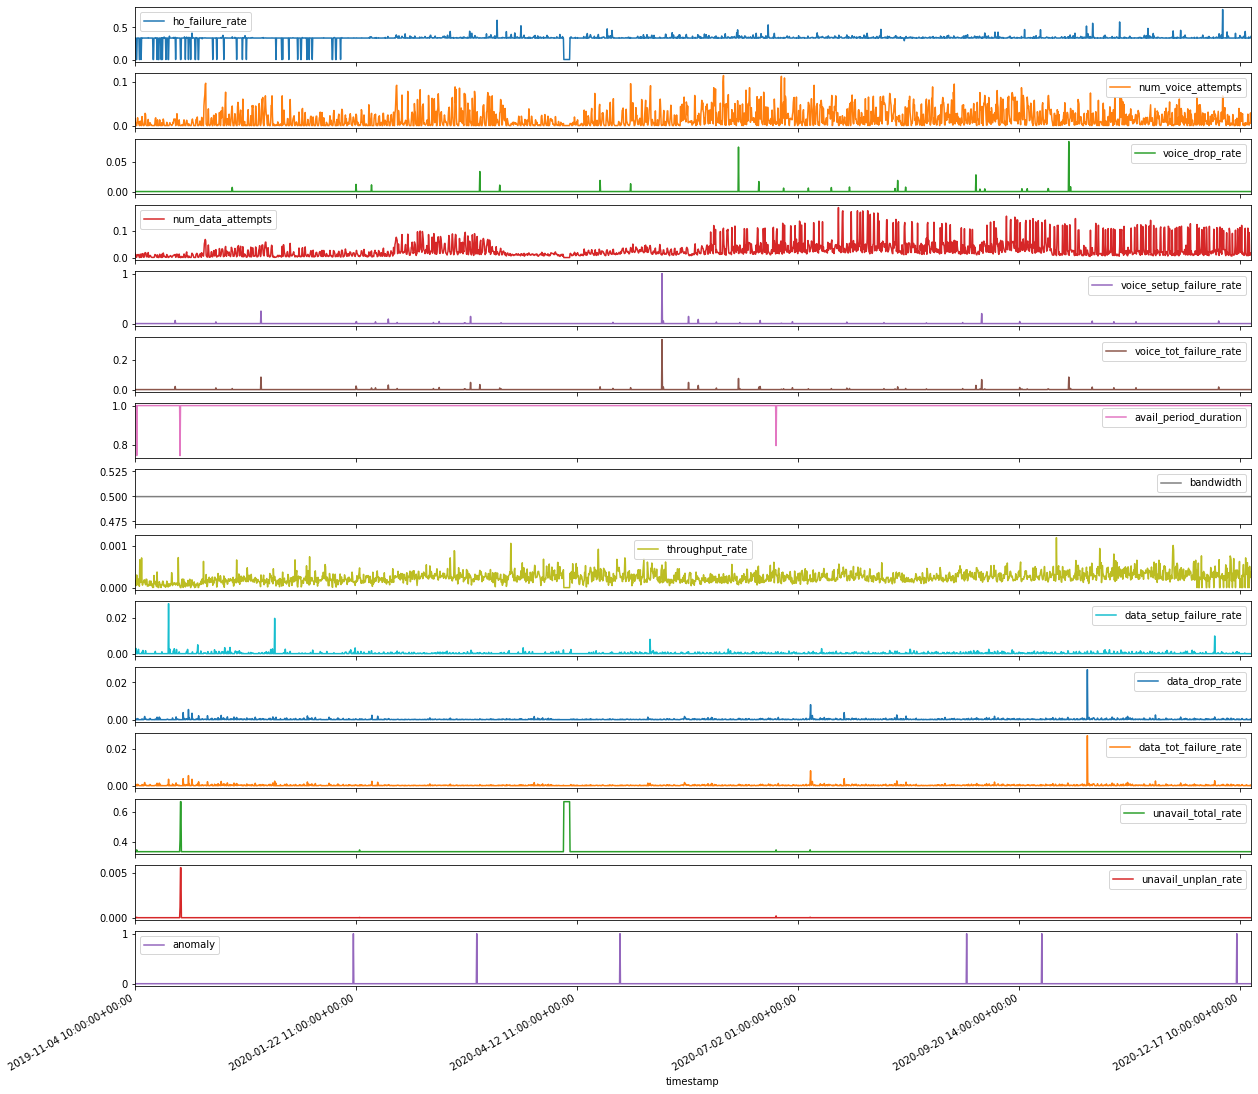

In [39]:
df_plot[cell_most_anomalous_events].plot(subplots = True, figsize = (20,20));


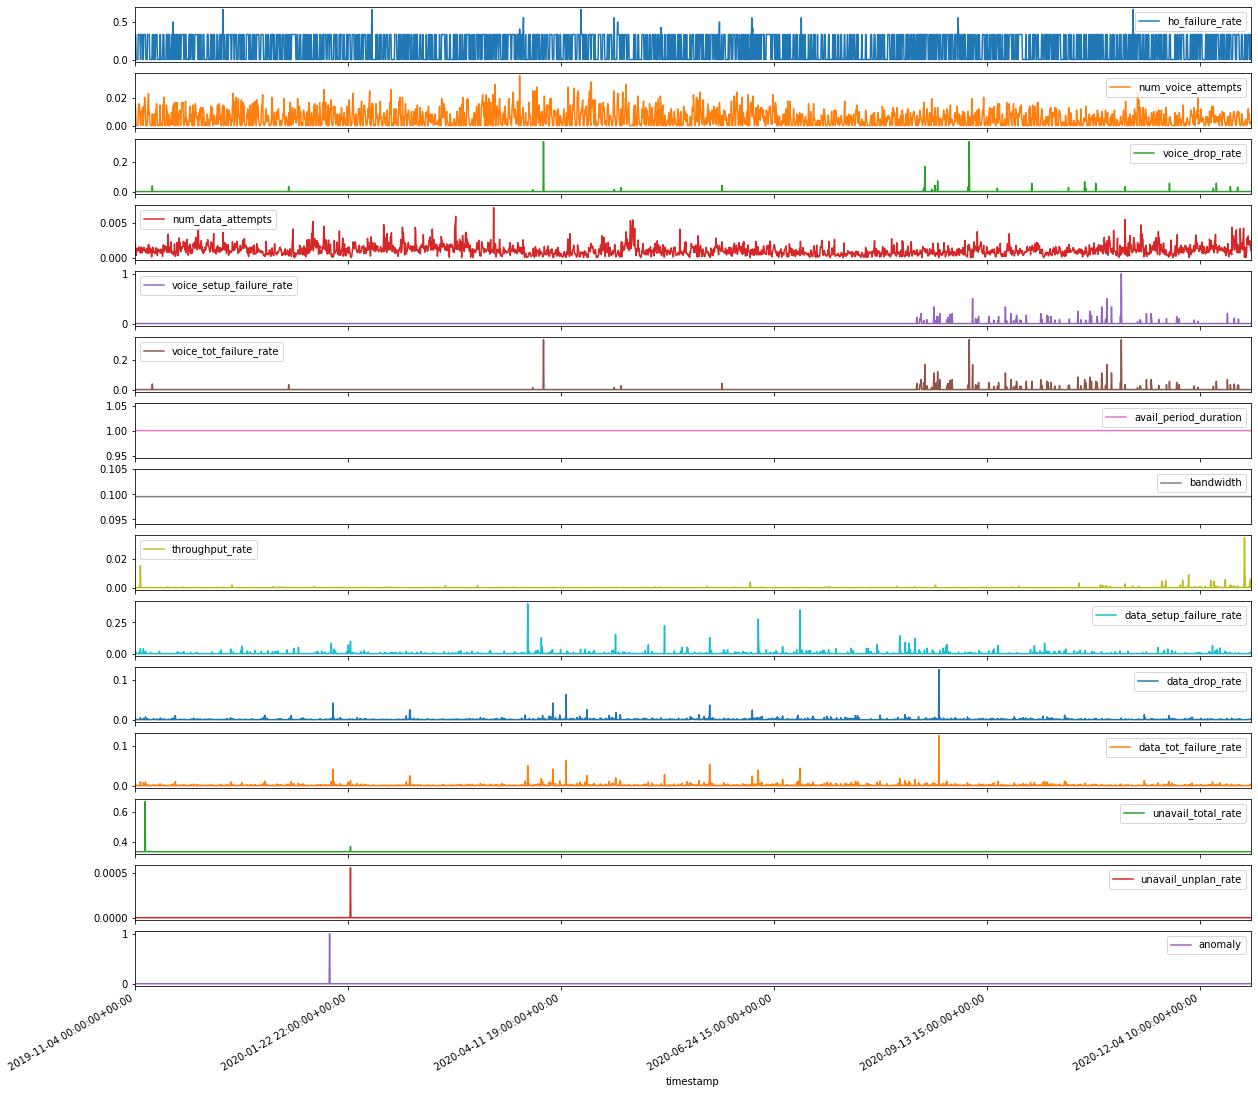

In [40]:
df_plot['02_31Q'].plot(subplots = True, figsize = (20,20));